In [1]:
import xarray as xr
import os
from glob import glob
import datetime
import os
import matplotlib.pyplot as plt

In [2]:
sm_flist=[]
rain_flist=[]
for day in range(1,5):
    sm_flist.append(glob(f"/g/data/hh5/tmp/dr4292/AUS2200_smc_correction/netcdf/day{day}/*/aus2200/d0198/RA3/um/umnsa_slv_*"))
    rain_flist.append(glob(f"/g/data/hh5/tmp/dr4292/AUS2200_smc_correction/netcdf/day{day}/*/aus2200/d0198/RA3/um/umnsa_spec_*"))

In [3]:
towns={'Lismore':{'lat':-28.81,'lon':153.285},'Mt Isa':{'lat':-20.726,'lon':139.493}}

In [4]:
k='Lismore'
sm_ds_s=[]
rain_ds_s=[]
for sm_ds_list in sm_flist:
    sm_ds_s.append([ xr.open_dataset(i)['fld_s08i223'].sel(towns[k],method='nearest') for i in sm_ds_list ])
for rain_ds_list in rain_flist:
    rain_ds_s.append([ xr.open_dataset(i)['fld_s04i201'].sel(towns[k],method='nearest') for i in rain_ds_list ])

In [5]:
rain_ds=[ xr.concat(i,'time_0') for i in rain_ds_s ]

In [6]:
sm_ds=[ xr.concat(i,'time') for i in sm_ds_s ]

Text(0.5, 1.0, 'Lismore')

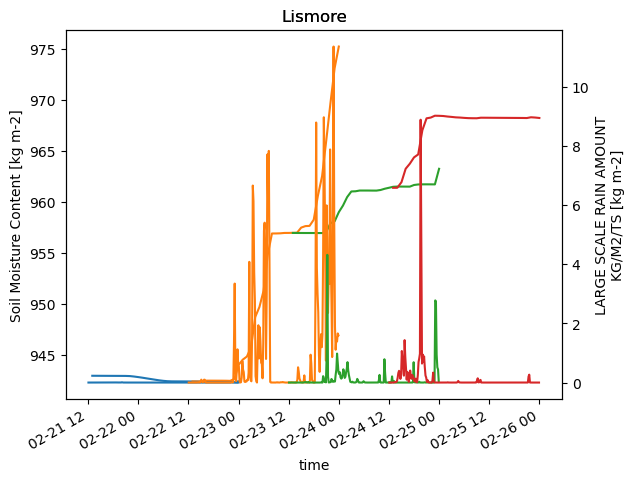

In [7]:
fig, ax1 = plt.subplots()
for i in sm_ds:
    i.sortby('time').sum('depth').plot(ax=ax1)
ax2=ax1.twinx()
ax1.set_title(k)
ax1.set_ylabel("Soil Moisture Content [kg m-2]")
for i in rain_ds:
    i.sortby('time_0').plot(ax=ax2)
ax2.set_title(k)

In [ ]:
sm_ds[0]